Import the necessary modules and Setting up the directory 

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\mihret.mekbebe\Documents\REQUESTS\KAIM\Customer-Experience-Analytics-for-Fintech-Apps-Week2


Scraping the data based on the imported module and loading it into a dataframe 

In [3]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Error getting app info for com.combanketh.mobilebanking: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.1726847
Total Ratings: 6366
Total Reviews: 1219

Dashenbank: Dashen Bank
App ID: com.cr2.amolelight
Error getting app info for com.cr2.amolelight: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 0 reviews


Banks:  33%|███▎      | 1/3 [01:05<02:10, 65.12s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [01:30<00:41, 41.77s/it]


Scraping reviews for com.cr2.amolelight...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [01:55<00:00, 38.53s/it]


Scraping Complete!

Total reviews collected: 800
Reviews per bank:
  Commercial Bank of Ethiopia: 0
  Bank of Abyssinia: 400
  Dashen Bank: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Rating: ⭐⭐⭐⭐⭐
Review: Very Good...
Date: 2025-11-28 20:18:20

Rating: ⭐⭐⭐⭐⭐
Review: goof...
Date: 2025-11-28 13:33:37

Dashen Bank:
------------------------------------------------------------

Rating: ⭐
Review: Very disappointing application. it's getting worst by the day. both Amole and their super app. Just abysmal. Very sad....
Date: 2025-10-31 19:25:05

Rating: ⭐⭐⭐⭐⭐
Review: Banking made simple, smart, and safe....
Date: 2025-10-28 15:35:23

Rating: ⭐⭐⭐⭐⭐
Review: It is the best of all i liked it i used it almost 2 years. As a idea i ask dashen bank system officier please make it self registerable app...
Date: 2025-10-27 19:37:55

✅ Scraping Finishe

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-29 03:47:54,Yasin Alemu,0,None,BOA,Bank of Abyssinia,25.05.03,Google Play
1,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28 20:18:20,Wariyo Dida,0,None,BOA,Bank of Abyssinia,None,Google Play
2,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28 13:33:37,Hailegebrail Tegegn,0,None,BOA,Bank of Abyssinia,None,Google Play
3,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28 12:19:31,Tsegay ab,0,None,BOA,Bank of Abyssinia,None,Google Play
4,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27 13:19:25,Yohanis Fikadu,0,None,BOA,Bank of Abyssinia,25.09.03,Google Play


Preprocessing the Scraped data and Loading it into a dataframe

In [4]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 800 reviews

[1/5] Checking for missing data...

Missing values:
  reply_content: 799 (99.88%)
  app_id: 207 (25.87%)

[3/5] Checking duplicated data...
Removed 0 duplicate reviews

[2/5] Handling missing values...

[4/5] Normalizing dates...
Date range: 2023-03-29 to 2025-11-29

[/5] Preparing final output...
Final dataset: 800 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 800
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 800

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Bank of Abyssinia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 459 (57.4%)
  ⭐⭐⭐⭐: 61 (7.6%)
  ⭐⭐⭐: 53 (6.6%)
  ⭐⭐: 31 (3.9%)
  ⭐: 196 (24.5%)

Date range: 2023-03-29 to 2025-11-29

✅ Preprocessing finished successfully!


Viewing the preprocessed data

In [5]:
df.head()

,review_text,rating,review_date,bank_code,bank_name,source
0,🙏👍,5,2025-11-29,BOA,Bank of Abyssinia,Google Play
1,Very Good,5,2025-11-28,BOA,Bank of Abyssinia,Google Play
2,goof,5,2025-11-28,BOA,Bank of Abyssinia,Google Play
3,good!,5,2025-11-28,BOA,Bank of Abyssinia,Google Play
4,good jop,5,2025-11-27,BOA,Bank of Abyssinia,Google Play


Visualizing based on Rating and Review Counts

C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_59204\1034508765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_59204\1034508765.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


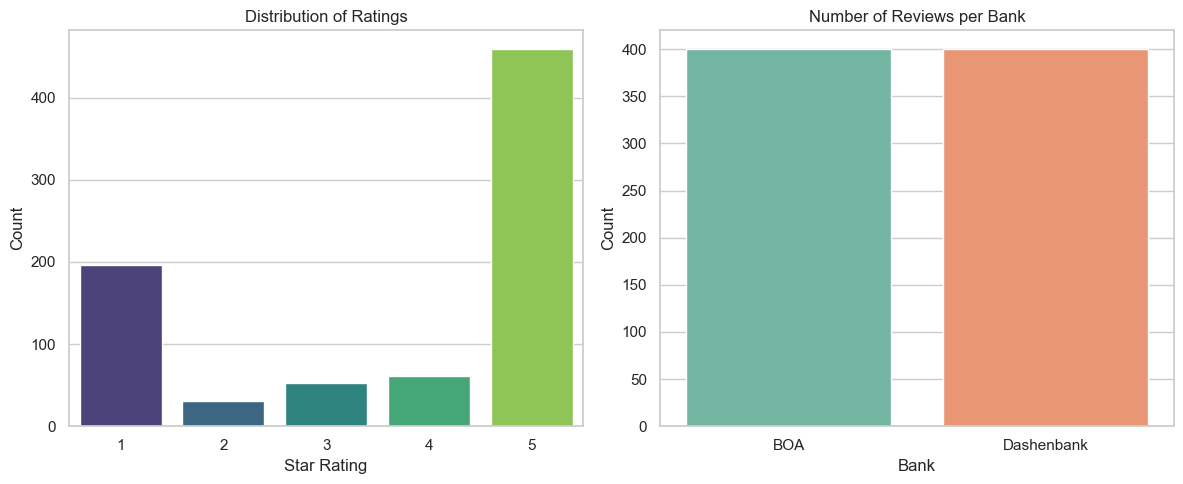

In [6]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Ensuring the scraped reviews of all Banks are 400
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()